# ●	Demonstration on how model scores a new data point?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import os
os.chdir(r'F:\ML project')
os.listdir()

['Data Sets-20220427',
 'Laptop Price Prediction using Linear regression.docx',
 'Stat.csv']

In [3]:
data=pd.read_csv( 'Stat.csv')
data.head()

,Unnamed: 0,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,HDD,Company_Acer,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Mac,OS_Others/No OS/Linux,OS_Windows
0,NaN,8,1.37,1339.69,0,1,226.983005,128,0,0,...,0,1,0,0,0,1,0,1,0,0
1,NaN,8,1.34,898.94,0,0,127.677940,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,NaN,8,1.86,575.00,0,0,141.211998,256,0,0,...,0,1,0,0,0,1,0,0,1,0
3,NaN,16,1.83,2537.45,0,1,220.534624,512,0,0,...,0,0,1,0,1,0,0,1,0,0
4,NaN,8,1.37,1803.60,0,1,226.983005,256,0,0,...,0,1,0,0,0,1,0,1,0,0


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data

,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,SSD,HDD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Mac,OS_Others/No OS/Linux,OS_Windows
0,8,1.37,1339.69,0,1,226.983005,128,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,8,1.34,898.94,0,0,127.677940,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,8,1.86,575.00,0,0,141.211998,256,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,16,1.83,2537.45,0,1,220.534624,512,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,8,1.37,1803.60,0,1,226.983005,256,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,638.00,1,1,157.350512,128,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1298,16,1.30,1499.00,1,1,276.053530,512,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1299,2,1.50,229.00,0,0,111.935204,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1300,6,2.19,764.00,0,0,100.454670,0,1000,0,0,...,0,0,1,0,1,0,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [7]:
train_data= data.drop(columns=['Price_euros'],axis=1)
test_data = np.log(data['Price_euros'])

In [8]:
train_data

,Ram,Weight,Touchscreen,IPS,PPI,SSD,HDD,Company_Acer,Company_Apple,Company_Asus,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Mac,OS_Others/No OS/Linux,OS_Windows
0,8,1.37,0,1,226.983005,128,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,8,1.34,0,0,127.677940,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,8,1.86,0,0,141.211998,256,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,512,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,8,1.37,0,1,226.983005,256,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,1,1,157.350512,128,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1298,16,1.30,1,1,276.053530,512,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1299,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1300,6,2.19,0,0,100.454670,0,1000,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [9]:
test_data

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1297    6.458338
1298    7.312553
1299    5.433722
1300    6.638568
1301    5.910797
Name: Price_euros, Length: 1302, dtype: float64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(train_data,test_data,test_size=0.2,random_state=2)

In [11]:
model2=LinearRegression()
model2

LinearRegression()

In [12]:
model2=LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [13]:
y_predddd=model2.predict(X_test)
y_predddd

array([6.72712827, 5.71575602, 6.07036779, 6.38473517, 6.9437906 ,
       7.44126687, 6.28257436, 6.42663654, 7.15690598, 5.6128624 ,
       6.95393244, 7.06065544, 7.75103731, 6.91739959, 8.03137573,
       6.88073791, 6.83000513, 5.62223004, 7.42881906, 7.53412476,
       7.71004839, 7.10345609, 6.82378433, 7.30789484, 6.5304038 ,
       7.81310729, 7.06631094, 6.14180438, 6.91944505, 6.65549664,
       7.12779325, 6.04696704, 6.60212378, 7.09170984, 7.12897571,
       6.8088513 , 6.94820725, 6.98471681, 7.25225535, 7.46971196,
       7.70403051, 7.29101154, 5.7810815 , 6.01384559, 6.21482689,
       6.03218129, 7.02709047, 7.95502731, 7.5421961 , 6.87432618,
       7.55575831, 7.51964576, 5.77748964, 5.54051673, 6.76095878,
       6.81851621, 6.08569127, 7.08354848, 6.23718042, 6.49119487,
       7.02266817, 7.12100846, 5.90666426, 6.51237122, 6.81769738,
       6.56731392, 6.06410751, 7.44547949, 6.75989954, 5.94857732,
       6.98344874, 6.77269115, 6.64078312, 6.46300594, 6.65357

In [14]:
np.exp(y_predddd)

array([  834.74665689,   303.61365508,   432.83984735,   592.72774254,
        1036.69246511,  1704.90874557,   535.16459756,   618.09151964,
        1282.93536311,   273.92720673,  1047.25992543,  1165.20864175,
        2323.98185029,  1009.6909658 ,  3075.97046453,   973.34433888,
         925.19555549,   276.50531415,  1683.81790603,  1870.80623316,
        2230.65020573,  1216.16298413,   919.45796538,  1492.03291012,
         685.67503174,  2472.8022183 ,  1171.81714847,   464.8916555 ,
        1011.75836026,   777.04373731,  1246.12404784,   422.82866082,
         736.65802794,  1201.9612014 ,  1247.59841042,   905.82968476,
        1041.28130033,  1080.00053218,  1411.28419983,  1754.10136411,
        2217.26671159,  1467.05392811,   324.10952432,   409.05335107,
         500.10940756,   416.62281241,  1126.7475311 ,  2849.86614965,
        1885.96725829,   967.1234823 ,  1911.71937544,  1843.91399235,
         322.94745889,   254.80963441,   863.46967435,   914.62689082,
      

In [15]:
print('R2 score',r2_score(y_test,y_predddd))
print('MAE',mean_absolute_error(y_test,y_predddd))

R2 score 0.8006470982907842
MAE 0.20425397221364042


In [16]:
l=list(train_data.iloc[1])
l

[8.0,
 1.34,
 0.0,
 0.0,
 127.6779401,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [17]:
new_input=[l]

In [18]:
p=model2.predict(new_input)
np.exp(p)

array([1232.94831478])

In [19]:
for i in train_data.columns:
    print(i)

Ram
Weight
Touchscreen
IPS
PPI
SSD
HDD
Company_Acer
Company_Apple
Company_Asus
Company_Chuwi
Company_Dell
Company_Fujitsu
Company_Google
Company_HP
Company_Huawei
Company_LG
Company_Lenovo
Company_MSI
Company_Mediacom
Company_Microsoft
Company_Razer
Company_Samsung
Company_Toshiba
Company_Vero
Company_Xiaomi
TypeName_2 in 1 Convertible
TypeName_Gaming
TypeName_Netbook
TypeName_Notebook
TypeName_Ultrabook
TypeName_Workstation
Cpu_brand_AMD Processor
Cpu_brand_Intel Core i3
Cpu_brand_Intel Core i5
Cpu_brand_Intel Core i7
Cpu_brand_Other Intel Processor
Gpu_brand_AMD
Gpu_brand_Intel
Gpu_brand_Nvidia
OS_Mac
OS_Others/No OS/Linux
OS_Windows


In [20]:
train_data.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'SSD', 'HDD',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Cpu_brand_AMD Processor', 'Cpu_brand_Intel Core i3',
       'Cpu_brand_Intel Core i5', 'Cpu_brand_Intel Core i7',
       'Cpu_brand_Other Intel Processor', 'Gpu_brand_AMD', 'Gpu_brand_Intel',
       'Gpu_brand_Nvidia', 'OS_Mac', 'OS_Others/No OS/Linux', 'OS_Windows'],
      dtype='object')

In [33]:
def com_name(name):
    ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia=[0 for i in range(19)]
    if name=='Dell':
        d=1
    elif name=='Lenovo':
        le=1
    elif name=='HP':
        h=1
    elif name=='Asus':
        asu=1
    elif name=='Acer':
        ac=1
    elif name=='MSI':
        msi=1
    elif name=='Toshiba':
        tos=1
    elif name=='Apple':
        app=1
    elif name=='Samsung':
        sam=1
    elif name=='Razer':
        ra=1  
    return ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia
def display(dis_type):
    t,i=0,0
    if dis_type=='Touchscreen':
        t=1
    elif dis_type=='IPS':
        i=0
    return t,i
def type_name(typ):
    co,ga,net,no,ul,wo=0,0,0,0,0,0
    if typ=='Notebook':
        no=1
    elif typ=='Gaming':
        ga=1
    elif typ=='Ultrabook':
        ul=1
    elif typ=='2 in 1':
        co=1
    elif typ=='Workstation':
        wo=1
    elif typ=='Netbook':
        net=1     
    return   co,ga,net,no,ul,wo
def cpu_brand(g_name):
    amd,i3,i5,i7,other=0,0,0,0,0
    if b_name=='AMD':
        amd=1
    elif b_name=='i3':
        i3=1
    elif b_name=='i5':
        i5=1
    elif b_name=='i7':
        i7=1
    else:
        other=1
    return amd,i3,i5,i7,other
def gpu_brand(g_name):
    amd,intel,nvidia=0,0,0
    if g_name=='AMD':
        amd=1
    elif b_name=='Intel':
        intel=1
    elif b_name=='Nvidia':
        nvidia=1
    return amd,intel,nvidia   
def os_type(os):
    wi,mac,oth=0,0,0
    if os=='Windows':
        wi=0
    elif os=='Mac':
        mac=0
    else:
        oth=0
    return wi,mac,oth    
def price_predictor(data):
    log_p=model2.predict([data])
    price_euros=np.exp(log_p)
    return price_euros
data=[]
print("Enter the Details of the Laptop")
name=input("Company name(Dell/Lenovo/HP/Asus/Acer/MSI/Toshiba/Apple/Samsung/Razer/others):")
ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia=com_name(name)
print("Display")
dis=input("Display_Type(IPS/Touchscreen):")
t,i=display(dis)
print("Type_Name")
t_name=input("Laptop type name(Notebook/Netbook/Gaming/Ultrabook/2 in 1/Workstation):")
co,ga,net,no,ul,wo=type_name(t_name)
Ram=int(input("RAM(in GB): "))
Weight=float(input("Weight(in kg): "))
x_res=int(input("X Resultion:"))
y_res=int(input("y Resolution:"))
inc=float(input("Inches:"))
PPI=(((x_res**2)+(y_res**2))**(1/2))/inc
SSD=int(input("SSD(in GB):"))
HDD=int(input("HDD(in GB):"))
print("CPU")
b_name=input("CPU brand name(AMD/Intel-i3/i5/i7/Others):")
b_amd,i3,i5,i7,other=cpu_brand(b_name)
print("GPU")
g_name=input("GPU brand name(AMD/Intel/Nvidia):")
g_amd,intel,nvidia=gpu_brand(g_name)
print("Operating System")
os=input("Name of Operating System(Windows/Mac/others):")
wi,mac,oth=os_type(os)
data=[Ram,Weight,t,i,PPI,SSD,HDD,ac,app,asu,chu,de,fuj,goog,hp,hua,lg,le,msi,mcom,mic,ra,sam,tos,ver,xia,co,ga,net,no,ul,wo,b_amd,i3,i5,i7,other,g_amd,intel,nvidia,wi,mac,oth]
print("Predicted_price(in euros):",*price_predictor(data))

Enter the Details of the Laptop
Company name(Dell/Lenovo/HP/Asus/Acer/MSI/Toshiba/Apple/Samsung/Razer/others):Dell
Display
Display_Type(IPS/Touchscreen):IPS
Type_Name
Laptop type name(Notebook/Netbook/Gaming/Ultrabook/2 in 1/Workstation):Notebook
RAM(in GB): 8
Weight(in kg): 1.25
X Resultion:1890
y Resolution:1080
Inches:17.3
SSD(in GB):128
HDD(in GB):1000
CPU
CPU brand name(AMD/Intel-i3/i5/i7/Others):i5
GPU
GPU brand name(AMD/Intel/Nvidia):AMD
Operating System
Name of Operating System(Windows/Mac/others):Windows
Predicted_price(in euros): 718.0580522883723


# Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
Score=cross_val_score(model2,train_data,test_data,cv=20)

In [23]:
Score

array([0.80977802, 0.75637966, 0.87139263, 0.80918926, 0.8134867 ,
       0.8406515 , 0.82249939, 0.86209807, 0.82639549, 0.8605259 ,
       0.85784209, 0.81684814, 0.82137125, 0.69490494, 0.75024084,
       0.67602692, 0.69591395, 0.77185448, 0.85375183, 0.80461132])

In [24]:
Score.mean()

0.800788120313421

# Residual Deviance

In [25]:
NEW_DF=pd.DataFrame({'Actual':np.exp((y_test)),'Predicted':np.exp(y_predddd)})
NEW_DF.sample(5)

,Actual,Predicted
1164,476.99,577.090176
323,902.00,899.228098
436,347.00,411.831891
1068,1329.00,2431.511570
172,309.00,329.272766


In [26]:
NEW_DF['Error']=NEW_DF['Actual']-NEW_DF['Predicted']
NEW_DF

,Actual,Predicted,Error
248,675.00,834.746657,-159.746657
555,224.00,303.613655,-79.613655
1250,399.00,432.839847,-33.839847
547,462.35,592.727743,-130.377743
885,1799.00,1036.692465,762.307535
...,...,...,...
861,1349.00,912.874937,436.125063
1203,1169.00,1069.410488,99.589512
790,1339.00,1163.752515,175.247485
1046,1469.00,1021.401935,447.598065


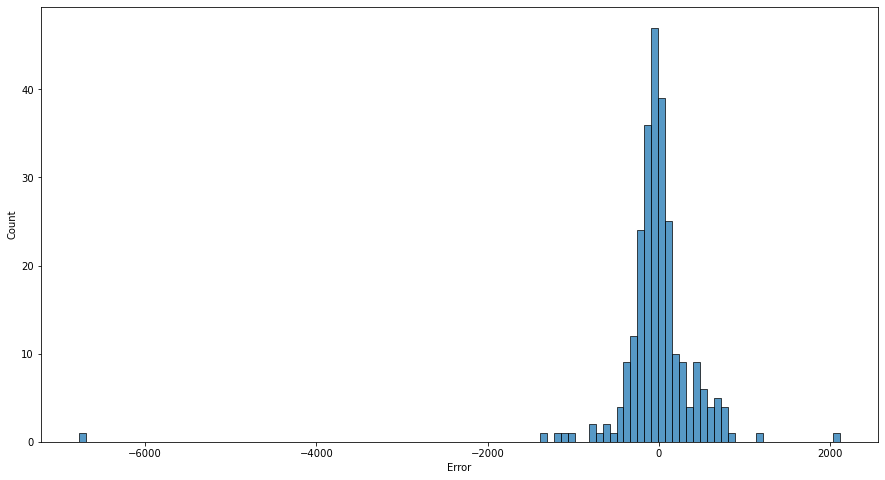

In [27]:
plt.figure(figsize=(15,8))
sns.histplot(data=NEW_DF,x='Error');

# OLS

In [28]:
import statsmodels.api as sm

In [29]:
X=sm.add_constant(train_data)
mo=sm.OLS(test_data,train_data).fit()

In [30]:
mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     169.1
Date:                Fri, 06 May 2022   Prob (F-statistic):               0.00
Time:                        04:17:24   Log-Likelihood:                -72.016
No. Observations:                1302   AIC:                             220.0
Df Residuals:                    1264   BIC:                             416.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Ram                                 0.0259      0.002     10.680      0.000       0.021       0.031
Weight                              0.0723      0.020      3.643      0.000       0.033       0.111
Touchscreen                        -0.1006      0.038     -2.616      0.009      -0.176      -0.025
IPS                                 0.0349      0.019      1.790      0.074      -0.003       0.073
PPI                                 0.0024      0.000      9.781      0.000       0.002       0.003
SSD                                 0.0006   6.76e-05      9.140      0.000       0.000       0.001
HDD                              4.727e-06   2.02e-05      0.234      0.815    -3.5e-05    4.44e-05
Company_Acer                        0.1099      0.036      3.052      0.002       0.039       0.181
Company_Apple                       1.2546      0.031     41.124      0.000       1.195       1.314
Company_Asus                        0.2037      0.033      6.250      0.000       0.140       0.268
Company_Chuwi                      -0.2327      0.147     -1.586      0.113      -0.521       0.055
Company_Dell                        0.2613      0.030      8.734      0.000       0.203       0.320
Company_Fujitsu                     0.1229      0.145      0.846      0.398      -0.162       0.408
Company_Google                      0.5562      0.149      3.729      0.000       0.264       0.849
Company_HP                          0.3021      0.030     10.159      0.000       0.244       0.360
Company_Huawei                      0.1533      0.177      0.867      0.386      -0.193       0.500
Company_LG                          0.5573      0.147      3.784      0.000       0.268       0.846
Company_Lenovo                      0.2147      0.029      7.312      0.000       0.157       0.272
Company_MSI                         0.3334      0.048      6.903      0.000       0.239       0.428
Company_Mediacom                   -0.2184      0.100     -2.195      0.028      -0.414      -0.023
Company_Microsoft                   0.5102      0.108      4.738      0.000       0.299       0.721
Company_Razer                       0.3437      0.100      3.438      0.001       0.148       0.540
Company_Samsung                     0.4245      0.092      4.633      0.000       0.245       0.604
Company_Toshiba                     0.4138      0.044      9.417      0.000       0.328       0.500
Company_Vero                       -0.4187      0.128     -3.280      0.001      -0.669      -0.168
Company_Xiaomi                      0.3198      0.129      2.483      0.013       0.067       0.572
TypeName_2 in 1 Convertible         0.8831      0.038     23.088      0.000       0.808       0.958
TypeName_Gaming                     0.8638      0.035     24.653      0.000       0

In [32]:
model2.coef_

array([ 2.78033543e-02,  7.96725474e-02, -1.02715083e-01,  4.45666203e-02,
        2.22050086e-03,  6.35587953e-04,  8.76902406e-06, -1.43846928e-01,
        1.35557336e-01, -2.86015416e-02, -4.55449594e-01,  1.36360310e-02,
       -1.50328630e-01,  3.49787514e-01,  3.98536276e-02, -8.55556800e-02,
        3.54930467e-01, -3.22795578e-02,  7.20863547e-02, -4.23544794e-01,
        3.37707452e-01,  1.01613855e-01,  1.78513563e-01,  1.62719243e-01,
       -6.42387785e-01,  2.15589067e-01, -1.51251474e-02, -3.05742784e-02,
       -2.10662875e-01, -2.37474410e-01,  1.70546447e-03,  4.92131246e-01,
       -1.46710940e-01, -6.56233349e-02,  2.41072506e-01,  2.96009356e-01,
       -3.24747587e-01, -6.64347265e-02,  4.27279511e-02,  2.37067753e-02,
        1.35557336e-01, -1.81997063e-01,  4.64397265e-02])